<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: center; position: absolute; right: 20px;color: #0a0a0a; ">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Mini Project - Digit Recognition <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">  Using MNIST DATASET

<!-- Link the Montserrat font -->
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@700&display=swap" rel="stylesheet">

<!-- Main div with centered content and a flexible box size, no scroll bar -->
<div style="background-color: #baf733; min-height: 100px; width: 100%; display: flex; justify-content: center; align-items: center; position: relative; padding: 20px; box-sizing: border-box; font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 20px; border-radius: 15px;">
    <div style="position: absolute; top: 10px; right: 10px; padding: 5px 10px; font-size: 14px; color: rgba(0, 0, 0, 0.05); border-radius: 10px;">Mohammad Idrees Bhat</div>
    <!-- Fill the below text with question -->
    <!-- Fill the below text with question -->
    What’s one thing you love doing with your friends?
    <!-- Fill the above text with question -->
    <!-- Fill the above text with question -->

</div>

If I have a 28x28 grid, how many tiny squares is the AI looking at for just one number?" 
- Answer: $28 \times 28 = 784$ tiny squares!

### the image isn't a "picture"—it’s a grid of numbers.

0 = Pure Black (no ink)

255 = Pure White (thickest ink)

Anything in between is a shade of gray.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



## understand the data first

In [3]:
data = tf.keras.datasets.mnist.load_data()

type(data)

len(data) # How many "Piles" are in the data? (Result: 2 -> Train and Test)

len(data[0])  # 2 items in this

len(data[0][0])

data[0][0].shape # Shape of Training Images - Result: (60000, 28, 28)
# 60K 28 x 28 images

(60000, 28, 28)

In [4]:
data[0][1] # Label for each image
len(data[0][1])

60000

In [5]:
data[0][1][12] # the first label # returns np.uint9(3) - 3 is the label

# let's check the image
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=150)
print(data[0][0][12])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  12  99  91 142 155 246 182 155 155 155 155 131  52   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138 254 254 254 254 254 254 254 254 254 254 254 252 210 122  33   0   0   0   0   0   0   0   0   0]
 [  0   0   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254  75   0   0   0   0   0   0   0   0   0]
 [  0   0   0  35  74  35  35  25   0   0   0   0   0   0  13 224 254 254 153   

In [6]:
data[0][0][12].dtype

dtype('uint8')

## Step 1: Load the Digits
- We use the MNIST dataset, which contains 70,000 small images of handwritten digits (0–9).

We have to unpack that data into train and test and we can do that like this:

In [ ]:
import tensorflow as tf # Import the AI library

In [7]:
# Load the built-in handwriting dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale the pixels to be between 0 and 1 (math is easier for AI this way)
X_train, X_test = X_train / 255.0, X_test / 255.0

print(len(X_train)," training images!")

60000  training images!


## Step 2: Look at a Digit
- It is important for to see that an image is just a grid of numbers.

In [8]:
print(X_train[12])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.

In [9]:
X_train[12].dtype # after scaling operation 

dtype('float64')

In [10]:
X_train[12].round(0).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,

Let's plot it out

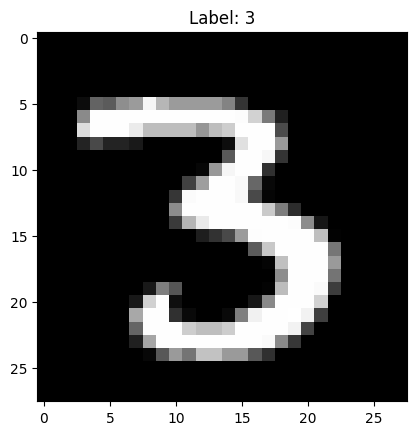

In [11]:
import matplotlib.pyplot as plt # Import plotting tool

plt.imshow(X_train[12], cmap='gray') # Show the first image in the set
plt.title(f"Label: {y_train[12]}")    # Show the real answer (the label)
plt.show() # Display the plot

<Axes: >

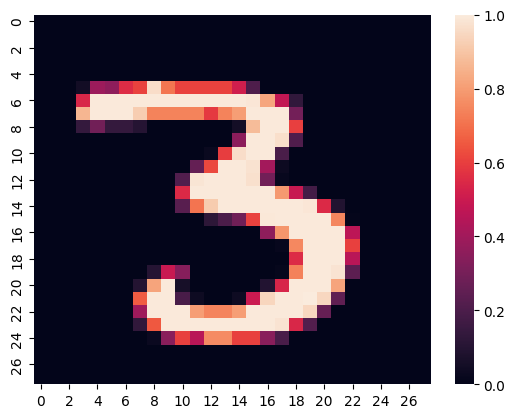

In [12]:
import seaborn as sns

sns.heatmap(X_train[12])

<Axes: >

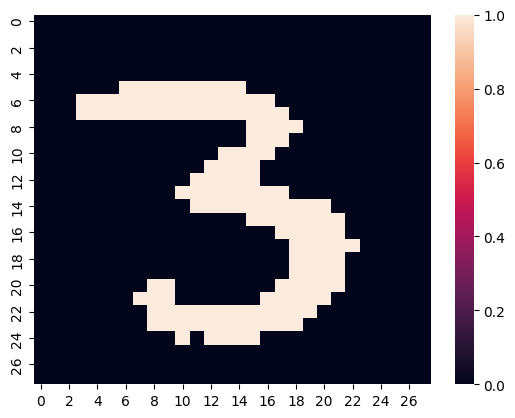

In [13]:
# wait, we turned it into black and white only once remember?
sns.heatmap(X_train[12].round(0).astype(int))

- Now we know about the images
- and that they have labels

- everything is unpacked in these: X_train, y_train, X_test, y_test

### Step 3: Build the "Brain" (The Model)
- We will build a simple "Stack" (Sequential) model. Imagine this as a series of filters.

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Squish the 2D image into a 1D line
  # the computer can't see the "shape" easily, so we stretch the $28 \times 28$ grid into one long line of 784 numbers.
  tf.keras.layers.Dense(128, activation='relu'),  # A layer of 128 'neurons' to find patterns
  tf.keras.layers.Dense(10, activation='softmax') # 10 neurons at the end (one for each digit 0-9)
  # the last layer is like 10 people shouting. The one shouting the loudest (highest probability) is the AI's guess.
])


c:\Users\devid\Desktop\Nexperts Academy\AIML Course Nexperts\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Tell the model how to learn
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

- Let's observe what flatten does

In [16]:
sample_image = X_train[12]
sample_image.shape

(28, 28)

In [17]:
# Flatten operation
flattened_img = sample_image.flatten()
flattened_img.shape

(784,)

A **Dense layer** is just Multiplication and Addition. Every neuron has a "Weight" (how much it cares about a specific pixel).

In [18]:
# Imagine a single neuron that only looks at the first 784 pixels
# We give every pixel a 'Weight' (importance)
weights = np.random.rand(784)
weights.shape

(784,)

In [19]:
# The Dense operation is basically: (Pixel_1 * Weight_1) + (Pixel_2 * Weight_2) ...
# This is called a "Dot Product"
neuron_output = np.dot(flattened_img, weights)
print(neuron_output)

70.30005325171399


**The Activation (ReLU) Demo: "The Filter"**
- You have activation='relu' in your code. ReLU is the simplest math in AI: 
- If the number is negative, make it zero. If it's positive, keep it.

In [20]:
# Let's say a neuron calculated a score of -15.5
score = -15.5

# ReLU says: "I don't care about negative energy!"
activated_score = max(0, score)

print(f"Before ReLU: {score}")
print(f"After ReLU:  {activated_score}")

Before ReLU: -15.5
After ReLU:  0


**The Softmax Demo: "The Loudest Voice"**
- At the end, you have 10 neurons. 
- Softmax takes their raw scores and turns them into Percentages that add up to 100%.

In [21]:
raw_scores = np.array([0, 1.0, 0.1]) # Imagine 3 neurons (Guessing 0, 1, or 2)

# Softmax math (simplified)
exp_scores = np.exp(raw_scores)
probabilities = exp_scores / np.sum(exp_scores)
probabilities

array([0.20732037, 0.56355519, 0.22912444])

In [22]:
# can show it like this
print("AI Confidence Scores:")

for i, prob in enumerate(probabilities):
    print(f"Digit {i}: {prob*100:.1f}%")

AI Confidence Scores:
Digit 0: 20.7%
Digit 1: 56.4%
Digit 2: 22.9%


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Training (The Learning Phase)
- This is where the model looks at the pictures and the answers repeatedly to learn.

In [25]:
# Train the model 3 times through the whole dataset
model.fit(X_train, y_train, epochs=3)

# Check how well it does on images it has NEVER seen before
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9276 - loss: 0.2580
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9666 - loss: 0.1143
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0777
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0932


In [26]:
print(f"The AI is {test_acc*100:.2f}% accurate!")
test_acc

The AI is 97.27% accurate!


0.9726999998092651

In [36]:
# 1. Get all predictions
predictions = model.predict(X_test)

# 2. Get the winning index for each prediction (the AI's "final guess")
y_pred = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Step 5: Make a Prediction
- Now, let's ask the AI to guess a specific digit from the test set.

- Remember the number of neurons in output layer?

In [28]:
import numpy as np 
img = X_test[11] # Grab the 11th image from the test set

prediction = model.predict(np.expand_dims(img, 0)) 

prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


(1, 10)

- How do you make prediction on this 28 x 28 array? Model doesn't know what to do with it
- So we do what? It wants a 3D container, even if we are only passing a single image inside

- so we do this:
    

In [29]:
img.shape

(28, 28)

In [30]:
np.expand_dims(img, 0).shape

(1, 28, 28)

In [31]:
row = np.array([10, 20, 30])
expanded = np.expand_dims(row, 0) # take row wrap in another dimension
expanded

expanded2 = np.expand_dims(expanded, 0)
expanded2
expanded2.shape

(1, 1, 3)

- Now that we can pass the test input, let's check what our model says

- since output layers are 10, we can expect ten outputs for 0 to 10


In [32]:
prediction = model.predict(np.expand_dims(img, 0))
prediction # gives confidence values for each index or each number 0 to 9

prediction.shape

prediction.max() # Max value from array - np.float32(0.98393124) # 6

prediction.argmax() # index of max value from array - np.int64(6) # 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


np.int64(6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
AI Guess: 0
Real Answer: 0


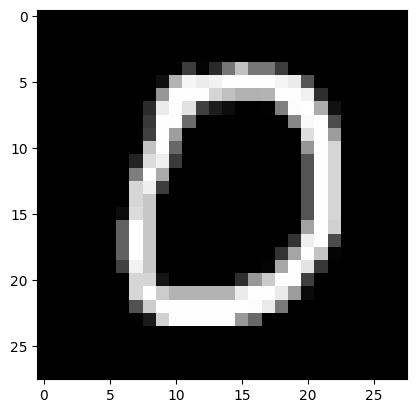

In [33]:
# do all at once for 10th image

img = X_test[10] # Grab the 11th image from the test set

prediction = model.predict(np.expand_dims(img, 0)) # Ask the AI for a guess

print(f"AI Guess: {np.argmax(prediction)}") # Show the highest confidence answer

# Let's see the real answer
print(f"Real Answer: {y_test[10]}")        

plt.imshow(img, cmap='gray') # Visual confirmation
plt.show()

- Computers don't see "colors"; they see values. imshow (short for Image Show) follows a simple rulebook:
    - see lowest number, fully black
    - see max, show white
    - and shades of gray for others

- cmap='gray', without it you will get hot and cold kind of scale

### Step 6: The "Confusion Matrix" (The AI Report Card)
- Copy this into a new cell. This will show a heat map of where the AI is succeeding and where it is failing.

In [37]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Get the raw predictions (the 10 probabilities)
raw_predictions = model.predict(X_test)

# 2. Find the index of the highest probability (the AI's choice)
y_pred = np.argmax(raw_predictions, axis=1)

# 3. Create the report comparing the AI's guesses to the Ground Truth (y_test)
report = classification_report(y_test, y_pred)

print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.96      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.98      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


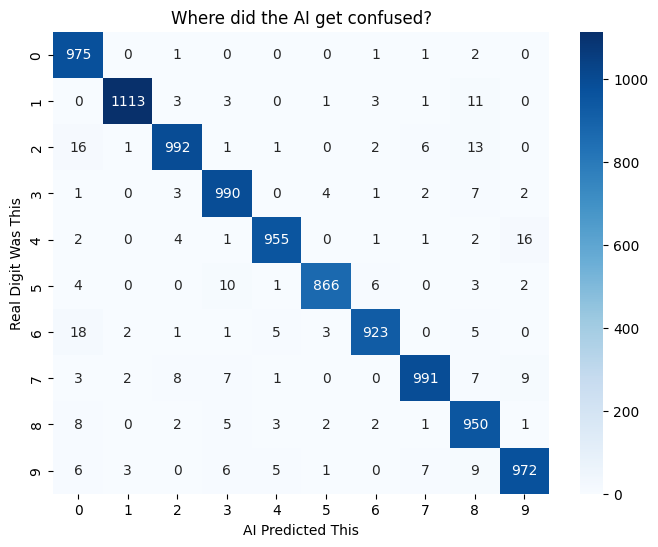

In [38]:


# 1. Get the AI's guesses for all test images
test_predictions = model.predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

# 2. Create the matrix (Compare Real vs Predicted)
cm = confusion_matrix(y_test, test_labels)

# 3. Plot it to make it look pretty and readable
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # 'd' shows whole numbers
plt.xlabel('AI Predicted This')
plt.ylabel('Real Digit Was This')
plt.title('Where did the AI get confused?')
plt.show()

- Diagonal Line - these are the correct guesses (where Real = Predicted)
- "Off-Diagonal" Squares: Look for any numbers outside that line.
    - Look at the row for 4 and the column for 9. If there is a number there, it means the AI saw a 4 but thought it was a 9.

---
## **Optional Next Steps ---**

### Step 7: Test Your Own Digit

Open Paint (on Windows) or any drawing app.

1. Draw a digit (0-9) in black ink on a white background.

2. Save it as a .png or .jpg.

3. Run the code below and upload that file.

In [ ]:
from PIL import Image # Tool to open images
import numpy as np # Tool for math
import matplotlib.pyplot as plt # Tool for showing the image

# 1. CHANGE THIS to your actual filename!
filename = "testimg.png" 

# 2. Open the image and convert to Grayscale (Black and White)
img = Image.open(filename).convert('L')

# 3. Resize it to 28x28 pixels (the exact size the AI learned)
img = img.resize((28, 28))

# 4. Turn the image into numbers
img_array = np.array(img)

# 5. Flip colors (If you drew black ink on white paper, we must flip it)
# AI needs white ink on black background!
img_array = 255 - img_array 

# 6. Normalize (Scale numbers to be between 0 and 1)
img_array = img_array / 255.0

# 7. Show the student exactly what the AI is "looking" at
plt.imshow(img_array, cmap='gray')
plt.title(f"Processed: {filename}")
plt.show()

# 8. Ask the AI to guess
# We reshape to (1, 28, 28) because the AI expects a "batch" of images
prediction = model.predict(img_array.reshape(1, 28, 28))

# 9. Print the final answer!
print(f"--- AI REPORT ---")
print(f"I think this digit is a: {np.argmax(prediction)}")
print(f"How sure am I? {np.max(prediction)*100:.2f}%")

## Testing your own image - using functions

In [ ]:
def preprocess_handwritten_image(img_path):
    """
    Loads an image file -> converts to MNIST-like 28x28 -> returns shape (1, 28, 28, 1)
    """
    img = Image.open(img_path).convert("L")  # grayscale

    # If background is white-ish, invert so digit becomes bright on dark (MNIST-style)
    img_np = np.array(img)
    if img_np.mean() > 127:
        img = ImageOps.invert(img)

    # Convert to array for cropping
    arr = np.array(img).astype(np.uint8)

    # Crop to bounding box of the digit (simple threshold)
    mask = arr > 30
    if mask.any():
        ys, xs = np.where(mask)
        arr = arr[ys.min():ys.max()+1, xs.min():xs.max()+1]

    # Make it square by padding
    h, w = arr.shape
    size = max(h, w)
    pad_y = (size - h) // 2
    pad_x = (size - w) // 2
    arr = np.pad(arr, ((pad_y, size - h - pad_y), (pad_x, size - w - pad_x)), mode="constant", constant_values=0)

    # Resize to 28x28
    img_resized = Image.fromarray(arr).resize((28, 28), Image.Resampling.LANCZOS)

    # Normalize to 0..1 and reshape for CNN
    x = (np.array(img_resized) / 255.0).astype("float32")[None, ..., None]  # (1,28,28,1)
    return x, img_resized

In [ ]:
def predict_and_show(img_path):
    x, preview = preprocess_handwritten_image(img_path)
    probs = model.predict(x, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    plt.figure(figsize=(3, 3))
    plt.imshow(preview, cmap="gray")
    plt.title(f"Predicted: {pred} (conf {conf:.2f})")
    plt.axis("off")
    plt.show()

    print("Top probabilities:", np.round(probs, 3))

print("\n=== Try your own handwritten digit image ===")


=== Try your own handwritten digit image ===


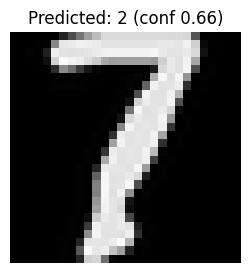

Top probabilities: [0.    0.289 0.661 0.032 0.    0.    0.002 0.007 0.008 0.   ]


In [ ]:
img_path = 'testimg.png'

predict_and_show(img_path)

## Improve the Results

1. Conv2D 
(The "Eye" for Detail)
- Instead of looking at the whole image as a giant list of pixels, this layer looks at small $3 \times 3$ patches. It acts like a magnifying glass searching for specific features:
    - Horizontal lines (like the top of your 7).Diagonal slants.
    - Corners and loops.
2. MaxPooling 
(The "Big Picture" Filter)
- This layer shrinks the image. It looks at a  $2 \times 2$ area and keeps only the brightest pixel.2 This makes the model robust. It tells the AI: "I don't care exactly which pixel is part of the '7', I just care that there is a '7' in this general area." It helps the AI recognize the digit even if it is slightly tilted or off-center.
3. Dense 
(The "Decision Maker")
- After the Conv2D layers have found the shapes (lines, hooks, loops), the Dense layers at the end take those "shapes" and vote on the final answer."I see a flat top and a diagonal stem... that must be a 7!"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# --- STEP 1: LOAD AND PREPARE DATA ---
# Load the dataset (Handwritten digits 0-9)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# CNNs need 4 dimensions: (Total Images, Height, Width, Color Channels)
# Since MNIST is grayscale, the channel is 1.
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# --- STEP 2: BUILD AN AWESOME MODEL (CNN) ---
# This model uses "filters" to find shapes like horizontal bars in a '7'
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    # Layer 1: Find 32 different features (edges, lines)
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Layer 2: Find more complex patterns
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Layer 3: Prevent memorization (Dropout)
    layers.Dropout(0.25), 
    
    # Layer 4: Final decision making
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 outputs for digits 0-9
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# --- STEP 3: TRAINING ---
print("Training the Awesome Model... (Wait for 3 epochs)")
model.fit(X_train, y_train, epochs=3, batch_size=64)

# --- STEP 4: PREDICT YOUR IMAGE (testimg.png) ---
filename = "testimg.png"

if os.path.exists(filename):
    # Process the image exactly like the training data
    img = Image.open(filename).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    
    # CRITICAL: MNIST is White Ink on Black Background.
    # If the plot below shows a Black digit on White, UNCOMMENT the line below:
    # img_array = 255 - img_array 
    
    img_array = img_array / 255.0
    test_input = img_array.reshape(1, 28, 28, 1) # Must match CNN input shape
    
    # Make Prediction
    prediction = model.predict(test_input)
    final_guess = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # --- STEP 5: VISUALIZE RESULT ---
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"AI Guess: {final_guess} ({confidence:.1f}%)")
    plt.axis('off')
    plt.show()
    
    print(f"Prediction: {final_guess} | Confidence: {confidence:.2f}%")
else:
    print(f"Error: {filename} not found in the current folder!")

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h3><b>Number Plate Detection - TensorFlow</b> 

In [ ]:
# pip install opencv-python

In [ ]:
import cv2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# --- 1. TRAIN A STRONGER BRAIN ---
# We use a deeper CNN with "Dropout" to prevent mistakes
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), # Helps the AI not "over-memorize"
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training high-accuracy model...")
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1) 

In [ ]:
# --- 2. THE ADVANCED RECOGNITION ---
image = cv2.imread('numberplate.png')

if image is None:
    print("Error: numberplate.png not found!")

In [ ]:
# use Open CV to do everything now     
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Gaussian Blur to remove 'noise' or 'grain'
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive Thresholding helps in different lighting
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
predictions = []

for ctr in contours:
    x, y, w, h = cv2.boundingRect(ctr)
    
    # Only process shapes that look like digits (ignores small noise)
    if h > 15: 
        # 1. Extract the digit
        roi = thresh[y:y+h, x:x+w]
        
        # 2. THE SECRET SAUCE: Add padding so it's not squashed
        # We add a 20% border around the digit
        pad = int(max(w, h) * 0.2)
        roi = cv2.copyMakeBorder(roi, pad, pad, pad, pad, 
                                 cv2.BORDER_CONSTANT, value=0)
        
        # 3. Resize to 28x28 and Normalize
        roi = cv2.resize(roi, (28, 28))
        roi = roi.astype('float32') / 255.0
        
        # 4. Predict
        test_input = roi.reshape(1, 28, 28, 1)
        pred = model.predict(test_input, verbose=0)
        digit = np.argmax(pred)
        predictions.append(str(digit))
        
        # Draw visual feedback
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, str(digit), (x, y-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

In [ ]:
# Final Display
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Highly Accurate Detection: {''.join(predictions)}")
plt.axis('off')
plt.show()

Adaptive Thresholding: Instead of one "global" light setting, it looks at local neighborhoods of pixels. This is great if one side of the number plate is darker than the other.

Gaussian Blur: This smooths out the "edges" of the image, so the AI doesn't get distracted by a rough texture on the plate.

The Padding Fix: By using copyMakeBorder, we ensure the digit stays centered and "comfortable" in its 28x28 box. Without this, a skinny number "1" gets stretched into a giant wide rectangle, which the AI won't recognize.

Deeper Model: We added a second Conv2D layer. This allows the AI to recognize more complex combinations of shapes.

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h3><b>Number Plate Detection - PyTorch</b> 

In [ ]:
# pip install torch torchvision torchaudio

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. THE BRAIN ARCHITECTURE (PyTorch Style) ---
class AwesomeCNN(nn.Module):
    def __init__(self):
        super(AwesomeCNN, self).__init__()
        # Layer 1: Conv -> Pool
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # Layer 2: Conv -> Pool
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Final Decision Layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# --- 2. DATA & TRAINING ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AwesomeCNN().to(device)

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("--- STARTING PYTORCH TRAINING ---")
model.train()
for epoch in range(3): # 3 Rounds
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 300 == 299: # Feedback every 300 batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 300:.3f}')
            running_loss = 0.0
print("--- TRAINING FINISHED ---\n")

# --- 3. THE RECOGNITION (OpenCV + PyTorch) ---
model.eval() # Set to evaluation mode
image = cv2.imread('numberplate.png')

if image is None:
    print("Error: numberplate.png not found!")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    predictions = []

    for i, ctr in enumerate(contours):
        x, y, w, h = cv2.boundingRect(ctr)
        if h > 15:
            roi = thresh[y:y+h, x:x+w]
            # Padding
            pad = int(max(w, h) * 0.3)
            roi = cv2.copyMakeBorder(roi, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)
            roi = cv2.resize(roi, (28, 28))
            
            # Prepare for PyTorch (Tensor + Normalization)
            roi_tensor = torch.from_numpy(roi).float().unsqueeze(0).unsqueeze(0).to(device)
            roi_tensor = (roi_tensor / 255.0 - 0.5) / 0.5
            
            with torch.no_grad():
                output = model(roi_tensor)
                digit = output.argmax(dim=1).item()
            
            print(f"Object {i+1}: AI detected a {digit}")
            predictions.append(str(digit))
            
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, str(digit), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"PyTorch Result: {''.join(predictions)}")
    plt.axis('off')
    plt.show()

<div style="background-color: lightblue; color: white; padding: 10px; text-align: center;">
    <h1>_________________________________END________________________________
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: #002147; color: #fff; padding: 30px; text-align: center;">
    <h1>THANK YOU!
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h4> Live Exercise Solutions
        
</h4> </div>

#### Task 1 solution

### Max Pooling

- https://www.youtube.com/watch?v=KKmCnwGzSv8

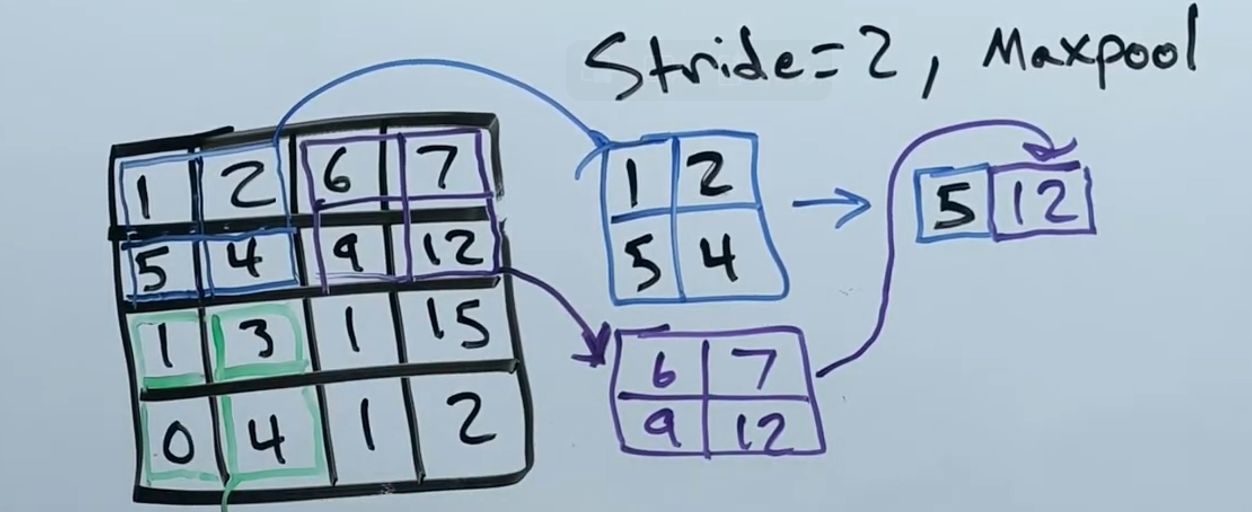

<!--- Mohammad Idrees Bhat | Mohammad Idrees Bhat --->

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->